In [5]:
from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

import numpy as np

- [Learn Quantum Computing with Qiskit: Shor’s Algorithm. By Monit Sharma](https://medium.com/@_monitsharma/learn-quantum-computing-with-qiskit-shors-algorithm-971b3f6d8795)
- [An Experimental Study of Shor's Factoring Algorithm on IBM Q.](https://arxiv.org/abs/1903.00768)
"They have factored 12,21 and 35 using something called the Kitaev approach. In Shor's algorithm, you perform the QFT in such a manner that the entire answer is given to you at once. However if you instead have a circuit where bit of the answer is given out one at a time, you can drastically reduce the number of required qubits. For example in this paper the number 15 is factored using only 5 qubits. Actually all experimental implementations of Shor's algorithm have been using the Kitaev approach, as otherwise far too many qubits are needed." [Link](https://quantumcomputing.stackexchange.com/questions/8326/is-it-possible-to-run-a-general-implementation-shors-algorithm-on-a-real-ibm-qu)

<img src="../images/shor.png" alt="Alt text" width="500" height="500">

### 

In [6]:
N = 15 
n = 4

In [7]:
a = 7
N_COUNT = 8

## QFT

<img src="../images/qft.png" alt="Alt text" width="500" height="250">

In [12]:

N_COUNT = 4
qft = QuantumCircuit(N_COUNT)

for i in range(N_COUNT-1, -1, -1):
    qft.h(i)
    k = 2
    for j in range(i-1, -1, -1):
        qft.cp(2*np.pi/(2**k), j, i)
        k += 1
#    qft.barrier()
for qubit in range(N_COUNT//2):
    qft.swap(qubit, N_COUNT-qubit-1)

qft_t = qft.inverse()
qft_t_gate = qft_t.to_gate()
qft_t_gate.name = 'QFT_T'

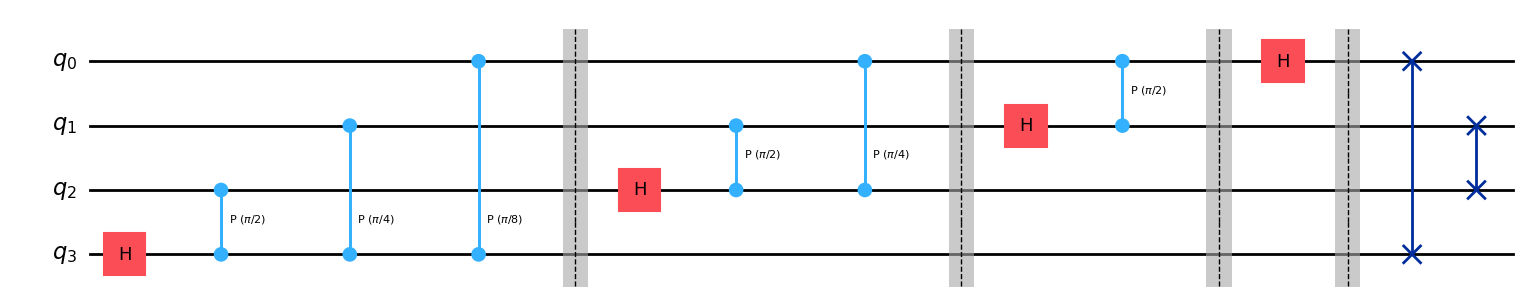

In [11]:
qft.draw("mpl")

## Find the order r

- ***Aula 11***

<img src="../images/qpe.png" alt="Alt text" width="500" height="400">

<img src="../images/u_shor.png" alt="Alt text" width="300" height="100">

In [13]:
from fractions import Fraction

In [ ]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    qc = QuantumCircuit(4)
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    for _iteration in range(power):
        if a in [2,13]:
            qc.swap(2,3)
            qc.swap(1,2)
            qc.swap(0,1)
        if a in [7,8]:
            qc.swap(0,1)
            qc.swap(1,2)
            qc.swap(2,3)
        if a in [4, 11]:
            qc.swap(1,3)
            qc.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                qc.x(q)
    U = qc.to_gate()
    U.name = f"{a}^{power} mod 15"
    c_U = U.control()
    return c_U